In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.4            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          36 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.13.4-pyhd8ed1a

In [4]:
# https://drive.google.com/file/d/14V6xb_wv9F2Nm4XSqQxCuZtDdmYT_Cge/view?usp=sharing
# https://drive.google.com/file/d/19juGcxAusUpX4Z62stexNLovoNrCWrb2/view?usp=sharing
# !gdown --id 14V6xb_wv9F2Nm4XSqQxCuZtDdmYT_Cge
!gdown --id 19juGcxAusUpX4Z62stexNLovoNrCWrb2

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19juGcxAusUpX4Z62stexNLovoNrCWrb2
From (redirected): https://drive.google.com/uc?id=19juGcxAusUpX4Z62stexNLovoNrCWrb2&confirm=t&uuid=f83c8a90-edab-400f-8019-20f2850b4899
To: /kaggle/working/TomatoDataset.zip
100%|████████████████████████████████████████| 274M/274M [00:05<00:00, 52.4MB/s]


In [5]:
# unzipping the folder , the contents are placed in Data->output->/kaggle/working 
# Currently each user is limited to 20GB data in kaggle 
!unzip TomatoDataset.zip

Archive:  TomatoDataset.zip
   creating: TomatoDataset/test/
   creating: TomatoDataset/test/Tomato___Bacterial_spot/
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/022e8a4a-9297-4de3-88a5-ee7aa46dd526___UF.GRC_BS_Lab Leaf 8682.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/030501db-683b-4ed5-9ec0-c475a5dfdd76___GCREC_Bact.Sp 5650.JPG  
  inflating: TomatoDataset/test/

In [6]:
# # remove folder from current working directory kaggle
# ! rm -rf folder_val

# # remove files from current working directory kaggle
# ! rm folder.zip

In [7]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2   # L1 and L2 regularization for model regularization
from tensorflow.keras.models import Model,Sequential, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

2024-04-12 06:14:49.831924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 06:14:49.832024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 06:14:49.948877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
# import os
# os.environ['XLA_FLAGS'] = '--xla_disable_jit'

# import tensorflow as tf
# print(tf.__version__)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the preprocessing pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Generate augmented versions of the dataset
train_generator = datagen.flow_from_directory(
    '/kaggle/working/TomatoDataset/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    '/kaggle/working/TomatoDataset/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 11298 images belonging to 10 classes.
Found 4839 images belonging to 10 classes.


In [10]:
import os
import matplotlib.pyplot as plt

# Directory where the images are stored
img_dir = '/kaggle/working/TomatoDataset/train'

# Get a list of all the subdirectories (which correspond to the classes)
class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]

# Create a list to store the number of images in each class
class_counts = []

# Iterate over each class directory
for class_dir in class_dirs:
    # Get the path to the class directory
    class_path = os.path.join(img_dir, class_dir)
    
    # Get a list of all the image files in the class directory
    img_files = [f for f in os.listdir(class_path)]
    
    # Add the number of images to the class_counts list
    class_counts.append(len(img_files))

# Plot the class counts
plt.bar(class_dirs, class_counts)
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Images')
plt.title('Number of Images in Train')
plt.show()

In [11]:
import os
import matplotlib.pyplot as plt

# Directory where the images are stored
img_dir = '/kaggle/working/TomatoDataset/test'

# Get a list of all the subdirectories (which correspond to the classes)
class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]

# Create a list to store the number of images in each class
class_counts = []

# Iterate over each class directory
for class_dir in class_dirs:
    # Get the path to the class directory
    class_path = os.path.join(img_dir, class_dir)
    
    # Get a list of all the image files in the class directory
    img_files = [f for f in os.listdir(class_path)]
    
    # Add the number of images to the class_counts list
    class_counts.append(len(img_files))

# Plot the class counts
plt.bar(class_dirs, class_counts)
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Images')
plt.title('Number of Images in Test')
plt.show()

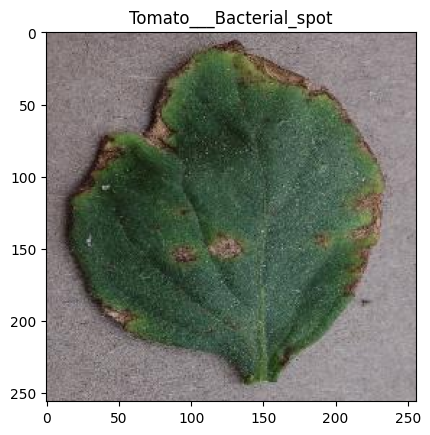

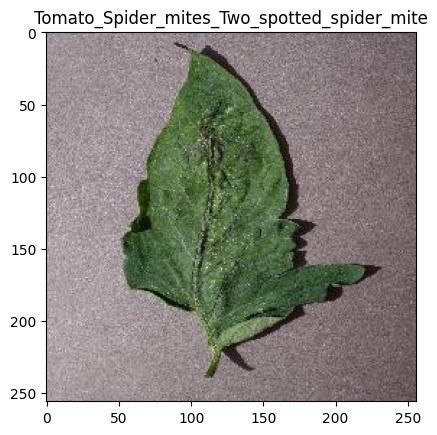

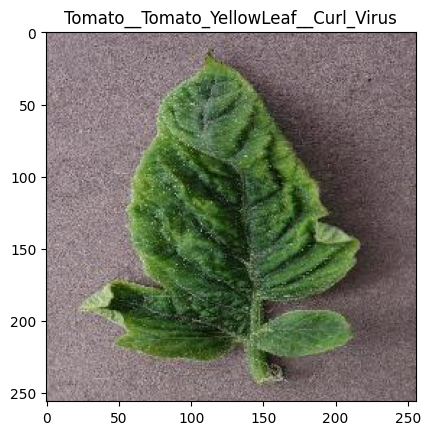

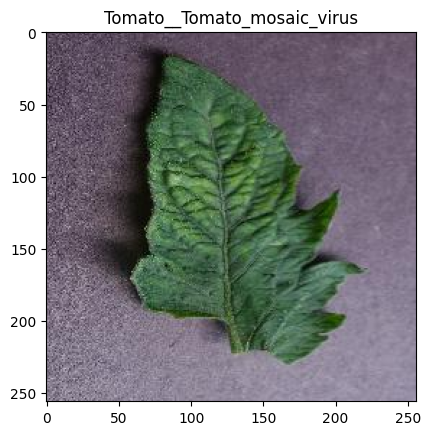

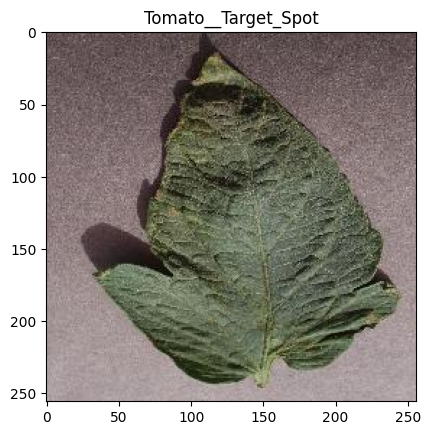

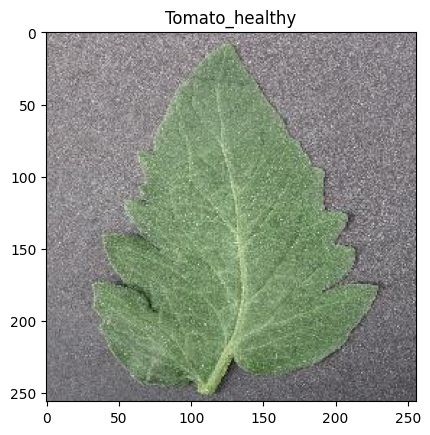

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset directory
dataset_dir = '/kaggle/working/TomatoDataset/train'

# Define the classes in the dataset
classes = ['Tomato___Bacterial_spot', 'Tomato_Early_blight', 'Tomato___Late_blight',
           'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
           'Tomato_Spider_mites_Two_spotted_spider_mite',
           'Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot', 'Tomato_healthy']

# Define the number of images to display for each class
num_images = 1

# Loop through each class
for class_ in classes:
    # Define the class directory
    class_dir = os.path.join(dataset_dir, class_)
    
    # Loop through each image in the class directory
    for i, filename in enumerate(os.listdir(class_dir)[:num_images]):
        # Construct the full path to the image file
        img_path = os.path.join(class_dir, filename)
        
        # Display the image
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(class_)
        plt.show()

In [19]:
# def q_relu(x):
#     if x>0:
#         x = x
#         return x
#     else:
#         x = 0.01*x-2*x
#         return x

import tensorflow as tf

def q_relu(x):
    """Quantum ReLU activation function."""
    return tf.where(tf.greater(x, 0), x, 0.01 * x)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.applications import DenseNet201, DenseNet121

from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D

def build_densenet():
    densenet = DenseNet201(weights='imagenet', include_top=False)

    input = Input(shape=(224,224,3))
    x = Conv2D(3, (3, 3), padding='same')(input)

    x = densenet(x)

    # Add a global average pooling layer
    x = GlobalAveragePooling2D()(x)

#     # Add batch normalization and dropout layers
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)

    # Add dense layers with 1024, 512, and 128 units and ReLU activation
    x = Dense(1024, activation= q_relu)(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation= q_relu)(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation= q_relu)(x)
    x = Dropout(0.2)(x)

    # Multi-output layer
    output = Dense(10, activation='softmax', name='root')(x)

    # Create the model
    model = Model(input, output)

#     # Compile the model
#     optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#     model.summary()

    return model

In [21]:
model = build_densenet()

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,880,926 (79.65 MB)

 Trainable params: 20,651,870 (78.78 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
from keras.callbacks import ModelCheckpoint

# Define the callback to save the best model based on validation accuracy
checkpoint_filepath = '/kaggle/working/best_model.weights.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')

In [24]:
# Train the model
# history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[EarlyStopping(patience=0)])
history = model.fit(train_generator, epochs=75, validation_data=validation_generator, 
                    callbacks=[checkpoint]) # 75 epochs

Epoch 1/75


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-12 06:27:12.806542: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_one_step_on_data_146221__.90875] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-04-12 06:27:14.828536: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m2.022171659s

********************************
[Compiling module a_inference_one_step_on_data_146221__.90875] Very slow compile? If you want to file a bug, run with envvar XLA_FLA

  6/177 ━━━━━━━━━━━━━━━━━━━━ 2:04:26 44s/step - accuracy: 0.2386 - loss: 2.1759

W0000 00:00:1712903453.980108    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6169 - loss: 1.1607
Epoch 1: val_accuracy improved from -inf to 0.64931, saving model to /kaggle/working/best_model.weights.h5


W0000 00:00:1712903661.681718    5409 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


177/177 ━━━━━━━━━━━━━━━━━━━━ 790s 2s/step - accuracy: 0.6177 - loss: 1.1586 - val_accuracy: 0.6493 - val_loss: 2.3959
Epoch 2/75
 20/177 ━━━━━━━━━━━━━━━━━━━━ 1:43 660ms/step - accuracy: 0.8828 - loss: 0.3644

W0000 00:00:1712903731.135416    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 21/177 ━━━━━━━━━━━━━━━━━━━━ 1:41 651ms/step - accuracy: 0.8826 - loss: 0.3652

W0000 00:00:1712903731.745656    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.8896 - loss: 0.3523
Epoch 2: val_accuracy did not improve from 0.64931
177/177 ━━━━━━━━━━━━━━━━━━━━ 223s 956ms/step - accuracy: 0.8897 - loss: 0.3521 - val_accuracy: 0.6324 - val_loss: 1.8563
Epoch 3/75
158/177 ━━━━━━━━━━━━━━━━━━━━ 12s 678ms/step - accuracy: 0.9254 - loss: 0.2434

W0000 00:00:1712903999.309542    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


159/177 ━━━━━━━━━━━━━━━━━━━━ 12s 676ms/step - accuracy: 0.9254 - loss: 0.2433

W0000 00:00:1712903999.947297    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9261 - loss: 0.2417
Epoch 3: val_accuracy improved from 0.64931 to 0.77268, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 176s 962ms/step - accuracy: 0.9261 - loss: 0.2416 - val_accuracy: 0.7727 - val_loss: 1.0012
Epoch 4/75
 31/177 ━━━━━━━━━━━━━━━━━━━━ 1:35 654ms/step - accuracy: 0.9401 - loss: 0.2158

W0000 00:00:1712904087.565754    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 32/177 ━━━━━━━━━━━━━━━━━━━━ 1:34 649ms/step - accuracy: 0.9402 - loss: 0.2152

W0000 00:00:1712904088.234422    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9442 - loss: 0.1976
Epoch 4: val_accuracy improved from 0.77268 to 0.86092, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 948ms/step - accuracy: 0.9442 - loss: 0.1976 - val_accuracy: 0.8609 - val_loss: 0.5480
Epoch 5/75
156/177 ━━━━━━━━━━━━━━━━━━━━ 14s 676ms/step - accuracy: 0.9510 - loss: 0.1621

W0000 00:00:1712904345.400830    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


157/177 ━━━━━━━━━━━━━━━━━━━━ 13s 675ms/step - accuracy: 0.9510 - loss: 0.1621

W0000 00:00:1712904346.066022    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9512 - loss: 0.1614
Epoch 5: val_accuracy did not improve from 0.86092
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 947ms/step - accuracy: 0.9512 - loss: 0.1613 - val_accuracy: 0.7138 - val_loss: 1.2486
Epoch 6/75
 31/177 ━━━━━━━━━━━━━━━━━━━━ 1:36 660ms/step - accuracy: 0.9531 - loss: 0.1673

W0000 00:00:1712904432.977675    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 32/177 ━━━━━━━━━━━━━━━━━━━━ 1:34 654ms/step - accuracy: 0.9531 - loss: 0.1669

W0000 00:00:1712904433.623907    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9560 - loss: 0.1473
Epoch 6: val_accuracy did not improve from 0.86092
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 947ms/step - accuracy: 0.9560 - loss: 0.1472 - val_accuracy: 0.5929 - val_loss: 2.7106
Epoch 7/75
 40/177 ━━━━━━━━━━━━━━━━━━━━ 1:30 657ms/step - accuracy: 0.9504 - loss: 0.1402

W0000 00:00:1712904611.398805    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 41/177 ━━━━━━━━━━━━━━━━━━━━ 1:28 653ms/step - accuracy: 0.9505 - loss: 0.1399

W0000 00:00:1712904612.058130    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9576 - loss: 0.1310
Epoch 7: val_accuracy did not improve from 0.86092
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 949ms/step - accuracy: 0.9576 - loss: 0.1310 - val_accuracy: 0.7917 - val_loss: 1.0838
Epoch 8/75
144/177 ━━━━━━━━━━━━━━━━━━━━ 22s 673ms/step - accuracy: 0.9613 - loss: 0.1260

W0000 00:00:1712904854.690247    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


145/177 ━━━━━━━━━━━━━━━━━━━━ 21s 672ms/step - accuracy: 0.9614 - loss: 0.1260

W0000 00:00:1712904855.342967    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9615 - loss: 0.1258
Epoch 8: val_accuracy did not improve from 0.86092
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 946ms/step - accuracy: 0.9615 - loss: 0.1258 - val_accuracy: 0.6966 - val_loss: 1.5297
Epoch 9/75
171/177 ━━━━━━━━━━━━━━━━━━━━ 4s 673ms/step - accuracy: 0.9744 - loss: 0.0894

W0000 00:00:1712905044.882230    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


172/177 ━━━━━━━━━━━━━━━━━━━━ 3s 671ms/step - accuracy: 0.9744 - loss: 0.0895

W0000 00:00:1712905045.250687    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9743 - loss: 0.0898
Epoch 9: val_accuracy improved from 0.86092 to 0.86939, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 175s 961ms/step - accuracy: 0.9743 - loss: 0.0898 - val_accuracy: 0.8694 - val_loss: 0.4719
Epoch 10/75
 35/177 ━━━━━━━━━━━━━━━━━━━━ 1:34 665ms/step - accuracy: 0.9727 - loss: 0.1105

W0000 00:00:1712905128.086787    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 36/177 ━━━━━━━━━━━━━━━━━━━━ 1:33 660ms/step - accuracy: 0.9728 - loss: 0.1100

W0000 00:00:1712905128.754528    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9724 - loss: 0.1055
Epoch 10: val_accuracy did not improve from 0.86939
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 941ms/step - accuracy: 0.9723 - loss: 0.1056 - val_accuracy: 0.8465 - val_loss: 0.5976
Epoch 11/75
 82/177 ━━━━━━━━━━━━━━━━━━━━ 1:03 665ms/step - accuracy: 0.9730 - loss: 0.0890

W0000 00:00:1712905330.502468    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 83/177 ━━━━━━━━━━━━━━━━━━━━ 1:02 663ms/step - accuracy: 0.9730 - loss: 0.0890

W0000 00:00:1712905331.152056    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9722 - loss: 0.0921
Epoch 11: val_accuracy did not improve from 0.86939
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 941ms/step - accuracy: 0.9722 - loss: 0.0922 - val_accuracy: 0.8653 - val_loss: 0.5170
Epoch 12/75
  9/177 ━━━━━━━━━━━━━━━━━━━━ 1:55 689ms/step - accuracy: 0.9690 - loss: 0.1412

W0000 00:00:1712905453.230379    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 10/177 ━━━━━━━━━━━━━━━━━━━━ 1:50 664ms/step - accuracy: 0.9692 - loss: 0.1398

W0000 00:00:1712905453.883595    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.9726 - loss: 0.0993
Epoch 12: val_accuracy did not improve from 0.86939
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 953ms/step - accuracy: 0.9726 - loss: 0.0992 - val_accuracy: 0.8374 - val_loss: 0.6034
Epoch 13/75
 68/177 ━━━━━━━━━━━━━━━━━━━━ 1:12 668ms/step - accuracy: 0.9713 - loss: 0.0963

W0000 00:00:1712905665.972139    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 69/177 ━━━━━━━━━━━━━━━━━━━━ 1:11 665ms/step - accuracy: 0.9714 - loss: 0.0962

W0000 00:00:1712905666.613667    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.9741 - loss: 0.0893
Epoch 13: val_accuracy did not improve from 0.86939
177/177 ━━━━━━━━━━━━━━━━━━━━ 170s 935ms/step - accuracy: 0.9741 - loss: 0.0893 - val_accuracy: 0.8568 - val_loss: 0.7590
Epoch 14/75
169/177 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - accuracy: 0.9790 - loss: 0.0735

W0000 00:00:1712905902.874674    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


170/177 ━━━━━━━━━━━━━━━━━━━━ 4s 662ms/step - accuracy: 0.9789 - loss: 0.0735

W0000 00:00:1712905903.243637    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9788 - loss: 0.0736
Epoch 14: val_accuracy did not improve from 0.86939
177/177 ━━━━━━━━━━━━━━━━━━━━ 170s 932ms/step - accuracy: 0.9788 - loss: 0.0737 - val_accuracy: 0.8365 - val_loss: 0.9745
Epoch 15/75
113/177 ━━━━━━━━━━━━━━━━━━━━ 42s 670ms/step - accuracy: 0.9736 - loss: 0.0985

W0000 00:00:1712906036.161760    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


114/177 ━━━━━━━━━━━━━━━━━━━━ 42s 668ms/step - accuracy: 0.9735 - loss: 0.0985

W0000 00:00:1712906036.588698    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.9731 - loss: 0.0997
Epoch 15: val_accuracy improved from 0.86939 to 0.93986, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 177s 974ms/step - accuracy: 0.9731 - loss: 0.0997 - val_accuracy: 0.9399 - val_loss: 0.2053
Epoch 16/75
115/177 ━━━━━━━━━━━━━━━━━━━━ 41s 671ms/step - accuracy: 0.9845 - loss: 0.0555

W0000 00:00:1712906215.217698    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


116/177 ━━━━━━━━━━━━━━━━━━━━ 40s 669ms/step - accuracy: 0.9844 - loss: 0.0556

W0000 00:00:1712906215.881704    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9831 - loss: 0.0620
Epoch 16: val_accuracy did not improve from 0.93986
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 954ms/step - accuracy: 0.9831 - loss: 0.0620 - val_accuracy: 0.9333 - val_loss: 0.2497
Epoch 17/75
105/177 ━━━━━━━━━━━━━━━━━━━━ 48s 673ms/step - accuracy: 0.9838 - loss: 0.0508

W0000 00:00:1712906382.507114    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


106/177 ━━━━━━━━━━━━━━━━━━━━ 47s 671ms/step - accuracy: 0.9838 - loss: 0.0508

W0000 00:00:1712906383.171010    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9825 - loss: 0.0550
Epoch 17: val_accuracy improved from 0.93986 to 0.98037, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 175s 960ms/step - accuracy: 0.9825 - loss: 0.0551 - val_accuracy: 0.9804 - val_loss: 0.0603
Epoch 18/75
 63/177 ━━━━━━━━━━━━━━━━━━━━ 1:16 674ms/step - accuracy: 0.9788 - loss: 0.0701

W0000 00:00:1712906529.171497    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 64/177 ━━━━━━━━━━━━━━━━━━━━ 1:15 670ms/step - accuracy: 0.9788 - loss: 0.0702

W0000 00:00:1712906529.831381    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.9797 - loss: 0.0697
Epoch 18: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 178s 975ms/step - accuracy: 0.9797 - loss: 0.0697 - val_accuracy: 0.8392 - val_loss: 0.8138
Epoch 19/75
 25/177 ━━━━━━━━━━━━━━━━━━━━ 1:40 663ms/step - accuracy: 0.9878 - loss: 0.0477

W0000 00:00:1712906680.907957    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 26/177 ━━━━━━━━━━━━━━━━━━━━ 1:38 656ms/step - accuracy: 0.9877 - loss: 0.0481

W0000 00:00:1712906681.563482    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.9846 - loss: 0.0533
Epoch 19: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 175s 958ms/step - accuracy: 0.9846 - loss: 0.0533 - val_accuracy: 0.8772 - val_loss: 0.5810
Epoch 20/75
142/177 ━━━━━━━━━━━━━━━━━━━━ 23s 685ms/step - accuracy: 0.9776 - loss: 0.0897

W0000 00:00:1712906936.258018    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


143/177 ━━━━━━━━━━━━━━━━━━━━ 23s 683ms/step - accuracy: 0.9776 - loss: 0.0897

W0000 00:00:1712906936.734691    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.9775 - loss: 0.0896
Epoch 20: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 177s 970ms/step - accuracy: 0.9775 - loss: 0.0896 - val_accuracy: 0.9151 - val_loss: 0.7722
Epoch 21/75
 92/177 ━━━━━━━━━━━━━━━━━━━━ 1:00 708ms/step - accuracy: 0.9801 - loss: 0.0630

W0000 00:00:1712907081.173174    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 93/177 ━━━━━━━━━━━━━━━━━━━━ 59s 706ms/step - accuracy: 0.9801 - loss: 0.0631 

W0000 00:00:1712907081.921430    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.9786 - loss: 0.0685
Epoch 21: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 177s 972ms/step - accuracy: 0.9786 - loss: 0.0686 - val_accuracy: 0.9642 - val_loss: 0.1231
Epoch 22/75
 13/177 ━━━━━━━━━━━━━━━━━━━━ 1:50 671ms/step - accuracy: 0.9822 - loss: 0.0719

W0000 00:00:1712907201.469653    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 14/177 ━━━━━━━━━━━━━━━━━━━━ 1:47 657ms/step - accuracy: 0.9819 - loss: 0.0724

W0000 00:00:1712907202.152558    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - accuracy: 0.9812 - loss: 0.0679
Epoch 22: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 178s 977ms/step - accuracy: 0.9812 - loss: 0.0679 - val_accuracy: 0.9487 - val_loss: 0.1821
Epoch 23/75
154/177 ━━━━━━━━━━━━━━━━━━━━ 15s 688ms/step - accuracy: 0.9845 - loss: 0.0482

W0000 00:00:1712907476.348487    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


155/177 ━━━━━━━━━━━━━━━━━━━━ 15s 686ms/step - accuracy: 0.9845 - loss: 0.0483

W0000 00:00:1712907477.066370    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.9842 - loss: 0.0494
Epoch 23: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 176s 967ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9783 - val_loss: 0.0702
Epoch 24/75
 99/177 ━━━━━━━━━━━━━━━━━━━━ 53s 681ms/step - accuracy: 0.9838 - loss: 0.0542

W0000 00:00:1712907613.783504    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


100/177 ━━━━━━━━━━━━━━━━━━━━ 52s 679ms/step - accuracy: 0.9838 - loss: 0.0542

W0000 00:00:1712907614.446937    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.9847 - loss: 0.0536
Epoch 24: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 955ms/step - accuracy: 0.9847 - loss: 0.0536 - val_accuracy: 0.9184 - val_loss: 0.4416
Epoch 25/75
131/177 ━━━━━━━━━━━━━━━━━━━━ 31s 678ms/step - accuracy: 0.9913 - loss: 0.0308

W0000 00:00:1712907809.132281    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


132/177 ━━━━━━━━━━━━━━━━━━━━ 30s 676ms/step - accuracy: 0.9913 - loss: 0.0309

W0000 00:00:1712907809.774697    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.9904 - loss: 0.0336
Epoch 25: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 957ms/step - accuracy: 0.9904 - loss: 0.0337 - val_accuracy: 0.9023 - val_loss: 0.4192
Epoch 26/75
 43/177 ━━━━━━━━━━━━━━━━━━━━ 1:30 678ms/step - accuracy: 0.9809 - loss: 0.0549

W0000 00:00:1712907923.773620    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 44/177 ━━━━━━━━━━━━━━━━━━━━ 1:29 673ms/step - accuracy: 0.9808 - loss: 0.0549

W0000 00:00:1712907924.437843    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9811 - loss: 0.0577
Epoch 26: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 955ms/step - accuracy: 0.9811 - loss: 0.0577 - val_accuracy: 0.9609 - val_loss: 0.1336
Epoch 27/75
 60/177 ━━━━━━━━━━━━━━━━━━━━ 1:19 680ms/step - accuracy: 0.9819 - loss: 0.0620

W0000 00:00:1712908109.482126    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 61/177 ━━━━━━━━━━━━━━━━━━━━ 1:18 676ms/step - accuracy: 0.9817 - loss: 0.0624

W0000 00:00:1712908110.132721    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.9791 - loss: 0.0746
Epoch 27: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 948ms/step - accuracy: 0.9791 - loss: 0.0746 - val_accuracy: 0.8729 - val_loss: 0.6022
Epoch 28/75
 18/177 ━━━━━━━━━━━━━━━━━━━━ 1:46 668ms/step - accuracy: 0.9826 - loss: 0.0627

W0000 00:00:1712908253.160668    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 19/177 ━━━━━━━━━━━━━━━━━━━━ 1:43 658ms/step - accuracy: 0.9829 - loss: 0.0618

W0000 00:00:1712908253.838341    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.9866 - loss: 0.0500
Epoch 28: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 952ms/step - accuracy: 0.9866 - loss: 0.0500 - val_accuracy: 0.8677 - val_loss: 0.5336
Epoch 29/75
 81/177 ━━━━━━━━━━━━━━━━━━━━ 1:05 679ms/step - accuracy: 0.9818 - loss: 0.0632

W0000 00:00:1712908469.422718    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 82/177 ━━━━━━━━━━━━━━━━━━━━ 1:04 676ms/step - accuracy: 0.9818 - loss: 0.0630

W0000 00:00:1712908470.088728    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9840 - loss: 0.0575
Epoch 29: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 949ms/step - accuracy: 0.9840 - loss: 0.0575 - val_accuracy: 0.9748 - val_loss: 0.0921
Epoch 30/75
 29/177 ━━━━━━━━━━━━━━━━━━━━ 1:37 656ms/step - accuracy: 0.9933 - loss: 0.0208

W0000 00:00:1712908606.175575    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 30/177 ━━━━━━━━━━━━━━━━━━━━ 1:35 649ms/step - accuracy: 0.9931 - loss: 0.0211

W0000 00:00:1712908606.833467    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9898 - loss: 0.0317
Epoch 30: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 950ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9663 - val_loss: 0.1489
Epoch 31/75
 61/177 ━━━━━━━━━━━━━━━━━━━━ 1:19 681ms/step - accuracy: 0.9675 - loss: 0.1774

W0000 00:00:1712908801.631829    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 62/177 ━━━━━━━━━━━━━━━━━━━━ 1:18 678ms/step - accuracy: 0.9673 - loss: 0.1776

W0000 00:00:1712908802.279520    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9633 - loss: 0.1692
Epoch 31: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 950ms/step - accuracy: 0.9633 - loss: 0.1690 - val_accuracy: 0.9165 - val_loss: 0.3684
Epoch 32/75
 38/177 ━━━━━━━━━━━━━━━━━━━━ 1:31 655ms/step - accuracy: 0.9858 - loss: 0.0349

W0000 00:00:1712908957.822932    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 39/177 ━━━━━━━━━━━━━━━━━━━━ 1:29 651ms/step - accuracy: 0.9859 - loss: 0.0350

W0000 00:00:1712908958.539066    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9853 - loss: 0.0476
Epoch 32: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 957ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9345 - val_loss: 0.2207
Epoch 33/75
 85/177 ━━━━━━━━━━━━━━━━━━━━ 1:02 679ms/step - accuracy: 0.9896 - loss: 0.0327

W0000 00:00:1712909164.829312    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 86/177 ━━━━━━━━━━━━━━━━━━━━ 1:01 677ms/step - accuracy: 0.9896 - loss: 0.0327

W0000 00:00:1712909165.603952    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9893 - loss: 0.0344
Epoch 33: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 945ms/step - accuracy: 0.9893 - loss: 0.0344 - val_accuracy: 0.9721 - val_loss: 0.1189
Epoch 34/75
 62/177 ━━━━━━━━━━━━━━━━━━━━ 1:17 672ms/step - accuracy: 0.9927 - loss: 0.0227

W0000 00:00:1712909320.777852    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 63/177 ━━━━━━━━━━━━━━━━━━━━ 1:16 669ms/step - accuracy: 0.9926 - loss: 0.0228

W0000 00:00:1712909321.584551    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.9885 - loss: 0.0365
Epoch 34: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 955ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.8485 - val_loss: 0.5712
Epoch 35/75
 13/177 ━━━━━━━━━━━━━━━━━━━━ 1:47 658ms/step - accuracy: 0.9892 - loss: 0.0394

W0000 00:00:1712909461.306593    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 14/177 ━━━━━━━━━━━━━━━━━━━━ 1:45 644ms/step - accuracy: 0.9893 - loss: 0.0391

W0000 00:00:1712909461.955147    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9905 - loss: 0.0302
Epoch 35: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 942ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9696 - val_loss: 0.1139
Epoch 36/75
 39/177 ━━━━━━━━━━━━━━━━━━━━ 1:32 667ms/step - accuracy: 0.9779 - loss: 0.0559

W0000 00:00:1712909650.456675    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 40/177 ━━━━━━━━━━━━━━━━━━━━ 1:30 662ms/step - accuracy: 0.9780 - loss: 0.0560

W0000 00:00:1712909651.097556    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.9816 - loss: 0.0552
Epoch 36: val_accuracy did not improve from 0.98037
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 937ms/step - accuracy: 0.9817 - loss: 0.0551 - val_accuracy: 0.9628 - val_loss: 0.1646
Epoch 37/75
170/177 ━━━━━━━━━━━━━━━━━━━━ 4s 678ms/step - accuracy: 0.9887 - loss: 0.0359

W0000 00:00:1712909910.240547    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


171/177 ━━━━━━━━━━━━━━━━━━━━ 4s 676ms/step - accuracy: 0.9887 - loss: 0.0359

W0000 00:00:1712909910.622044    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9886 - loss: 0.0362
Epoch 37: val_accuracy improved from 0.98037 to 0.98450, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 175s 963ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9845 - val_loss: 0.0505
Epoch 38/75
128/177 ━━━━━━━━━━━━━━━━━━━━ 32s 665ms/step - accuracy: 0.9884 - loss: 0.0300

W0000 00:00:1712910055.272866    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


129/177 ━━━━━━━━━━━━━━━━━━━━ 31s 663ms/step - accuracy: 0.9884 - loss: 0.0301

W0000 00:00:1712910055.917142    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.9881 - loss: 0.0323
Epoch 38: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 169s 930ms/step - accuracy: 0.9881 - loss: 0.0324 - val_accuracy: 0.9709 - val_loss: 0.1198
Epoch 39/75
134/177 ━━━━━━━━━━━━━━━━━━━━ 28s 659ms/step - accuracy: 0.9916 - loss: 0.0329

W0000 00:00:1712910227.708005    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


135/177 ━━━━━━━━━━━━━━━━━━━━ 27s 657ms/step - accuracy: 0.9916 - loss: 0.0329

W0000 00:00:1712910228.553707    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.9917 - loss: 0.0323
Epoch 39: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 939ms/step - accuracy: 0.9917 - loss: 0.0323 - val_accuracy: 0.9500 - val_loss: 0.2590
Epoch 40/75
 16/177 ━━━━━━━━━━━━━━━━━━━━ 1:44 646ms/step - accuracy: 0.9940 - loss: 0.0456

W0000 00:00:1712910320.778975    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 17/177 ━━━━━━━━━━━━━━━━━━━━ 1:41 635ms/step - accuracy: 0.9940 - loss: 0.0452

W0000 00:00:1712910321.437677    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9842 - loss: 0.0663
Epoch 40: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 940ms/step - accuracy: 0.9842 - loss: 0.0663 - val_accuracy: 0.9155 - val_loss: 0.3905
Epoch 41/75
 93/177 ━━━━━━━━━━━━━━━━━━━━ 55s 660ms/step - accuracy: 0.9851 - loss: 0.0498

W0000 00:00:1712910543.203476    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 94/177 ━━━━━━━━━━━━━━━━━━━━ 54s 658ms/step - accuracy: 0.9851 - loss: 0.0498

W0000 00:00:1712910543.903182    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.9858 - loss: 0.0473
Epoch 41: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 170s 934ms/step - accuracy: 0.9858 - loss: 0.0473 - val_accuracy: 0.9771 - val_loss: 0.0803
Epoch 42/75
166/177 ━━━━━━━━━━━━━━━━━━━━ 7s 671ms/step - accuracy: 0.9893 - loss: 0.0346

W0000 00:00:1712910763.165985    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


167/177 ━━━━━━━━━━━━━━━━━━━━ 6s 669ms/step - accuracy: 0.9893 - loss: 0.0346

W0000 00:00:1712910763.720349    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.9892 - loss: 0.0350
Epoch 42: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 941ms/step - accuracy: 0.9892 - loss: 0.0350 - val_accuracy: 0.9423 - val_loss: 0.3543
Epoch 43/75
 69/177 ━━━━━━━━━━━━━━━━━━━━ 1:13 684ms/step - accuracy: 0.9903 - loss: 0.0330

W0000 00:00:1712910870.167580    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 70/177 ━━━━━━━━━━━━━━━━━━━━ 1:12 680ms/step - accuracy: 0.9904 - loss: 0.0329

W0000 00:00:1712910870.602726    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.9908 - loss: 0.0327
Epoch 43: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 957ms/step - accuracy: 0.9908 - loss: 0.0327 - val_accuracy: 0.9467 - val_loss: 0.2421
Epoch 44/75
115/177 ━━━━━━━━━━━━━━━━━━━━ 41s 670ms/step - accuracy: 0.9907 - loss: 0.0356

W0000 00:00:1712911074.367133    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


116/177 ━━━━━━━━━━━━━━━━━━━━ 40s 668ms/step - accuracy: 0.9907 - loss: 0.0355

W0000 00:00:1712911075.031904    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9907 - loss: 0.0353
Epoch 44: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 945ms/step - accuracy: 0.9907 - loss: 0.0353 - val_accuracy: 0.7659 - val_loss: 1.6201
Epoch 45/75
 83/177 ━━━━━━━━━━━━━━━━━━━━ 1:02 668ms/step - accuracy: 0.9882 - loss: 0.0426

W0000 00:00:1712911224.777541    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 84/177 ━━━━━━━━━━━━━━━━━━━━ 1:01 665ms/step - accuracy: 0.9882 - loss: 0.0425

W0000 00:00:1712911225.196383    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9880 - loss: 0.0424
Epoch 45: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 940ms/step - accuracy: 0.9880 - loss: 0.0424 - val_accuracy: 0.9256 - val_loss: 0.3953
Epoch 46/75
 26/177 ━━━━━━━━━━━━━━━━━━━━ 1:36 640ms/step - accuracy: 0.9876 - loss: 0.0257

W0000 00:00:1712911357.494332    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 27/177 ━━━━━━━━━━━━━━━━━━━━ 1:35 634ms/step - accuracy: 0.9876 - loss: 0.0260

W0000 00:00:1712911358.184306    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.9879 - loss: 0.0353
Epoch 46: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 170s 935ms/step - accuracy: 0.9879 - loss: 0.0353 - val_accuracy: 0.8814 - val_loss: 0.6927
Epoch 47/75
 85/177 ━━━━━━━━━━━━━━━━━━━━ 1:01 668ms/step - accuracy: 0.9882 - loss: 0.0374

W0000 00:00:1712911567.589939    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 86/177 ━━━━━━━━━━━━━━━━━━━━ 1:00 664ms/step - accuracy: 0.9882 - loss: 0.0374

W0000 00:00:1712911568.214122    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.9883 - loss: 0.0385
Epoch 47: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 170s 937ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.8834 - val_loss: 0.7138
Epoch 48/75
136/177 ━━━━━━━━━━━━━━━━━━━━ 27s 676ms/step - accuracy: 0.9890 - loss: 0.0356

W0000 00:00:1712911773.310990    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


137/177 ━━━━━━━━━━━━━━━━━━━━ 26s 674ms/step - accuracy: 0.9890 - loss: 0.0356

W0000 00:00:1712911774.002000    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9892 - loss: 0.0349
Epoch 48: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 944ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9124 - val_loss: 0.3542
Epoch 49/75
155/177 ━━━━━━━━━━━━━━━━━━━━ 14s 674ms/step - accuracy: 0.9914 - loss: 0.0271

W0000 00:00:1712911957.892449    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


156/177 ━━━━━━━━━━━━━━━━━━━━ 14s 673ms/step - accuracy: 0.9914 - loss: 0.0272

W0000 00:00:1712911958.538993    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9911 - loss: 0.0285
Epoch 49: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 949ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.8351 - val_loss: 1.1959
Epoch 50/75
170/177 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step - accuracy: 0.9910 - loss: 0.0386

W0000 00:00:1712912139.846846    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


171/177 ━━━━━━━━━━━━━━━━━━━━ 4s 667ms/step - accuracy: 0.9910 - loss: 0.0386

W0000 00:00:1712912140.218254    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9910 - loss: 0.0384
Epoch 50: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 942ms/step - accuracy: 0.9910 - loss: 0.0384 - val_accuracy: 0.9572 - val_loss: 0.2342
Epoch 51/75
166/177 ━━━━━━━━━━━━━━━━━━━━ 7s 677ms/step - accuracy: 0.9907 - loss: 0.0343

W0000 00:00:1712912310.186062    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


167/177 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step - accuracy: 0.9907 - loss: 0.0343

W0000 00:00:1712912310.721678    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9906 - loss: 0.0345
Epoch 51: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 950ms/step - accuracy: 0.9906 - loss: 0.0346 - val_accuracy: 0.8969 - val_loss: 0.6171
Epoch 52/75
142/177 ━━━━━━━━━━━━━━━━━━━━ 23s 674ms/step - accuracy: 0.9920 - loss: 0.0421

W0000 00:00:1712912466.554268    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


143/177 ━━━━━━━━━━━━━━━━━━━━ 22s 672ms/step - accuracy: 0.9920 - loss: 0.0420

W0000 00:00:1712912467.201518    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9922 - loss: 0.0394
Epoch 52: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 948ms/step - accuracy: 0.9922 - loss: 0.0394 - val_accuracy: 0.9634 - val_loss: 0.1858
Epoch 53/75
133/177 ━━━━━━━━━━━━━━━━━━━━ 29s 668ms/step - accuracy: 0.9942 - loss: 0.0227

W0000 00:00:1712912632.524593    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


134/177 ━━━━━━━━━━━━━━━━━━━━ 28s 667ms/step - accuracy: 0.9942 - loss: 0.0228

W0000 00:00:1712912633.178562    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.9938 - loss: 0.0245
Epoch 53: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 947ms/step - accuracy: 0.9938 - loss: 0.0245 - val_accuracy: 0.9227 - val_loss: 0.4512
Epoch 54/75
 54/177 ━━━━━━━━━━━━━━━━━━━━ 1:23 676ms/step - accuracy: 0.9884 - loss: 0.0385

W0000 00:00:1712912752.254844    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 55/177 ━━━━━━━━━━━━━━━━━━━━ 1:21 670ms/step - accuracy: 0.9884 - loss: 0.0384

W0000 00:00:1712912752.720987    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9899 - loss: 0.0337
Epoch 54: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 944ms/step - accuracy: 0.9899 - loss: 0.0337 - val_accuracy: 0.9833 - val_loss: 0.0629
Epoch 55/75
 56/177 ━━━━━━━━━━━━━━━━━━━━ 1:22 679ms/step - accuracy: 0.9953 - loss: 0.0165

W0000 00:00:1712912925.759018    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 57/177 ━━━━━━━━━━━━━━━━━━━━ 1:21 676ms/step - accuracy: 0.9953 - loss: 0.0166

W0000 00:00:1712912926.427004    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.9938 - loss: 0.0249
Epoch 55: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 953ms/step - accuracy: 0.9938 - loss: 0.0250 - val_accuracy: 0.9692 - val_loss: 0.1460
Epoch 56/75
130/177 ━━━━━━━━━━━━━━━━━━━━ 31s 675ms/step - accuracy: 0.9887 - loss: 0.0429

W0000 00:00:1712913148.919000    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


131/177 ━━━━━━━━━━━━━━━━━━━━ 31s 674ms/step - accuracy: 0.9887 - loss: 0.0429

W0000 00:00:1712913149.554855    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9891 - loss: 0.0409
Epoch 56: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 944ms/step - accuracy: 0.9891 - loss: 0.0409 - val_accuracy: 0.8880 - val_loss: 0.8035
Epoch 57/75
153/177 ━━━━━━━━━━━━━━━━━━━━ 16s 680ms/step - accuracy: 0.9919 - loss: 0.0272

W0000 00:00:1712913336.913132    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


154/177 ━━━━━━━━━━━━━━━━━━━━ 15s 679ms/step - accuracy: 0.9919 - loss: 0.0273

W0000 00:00:1712913337.599891    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.9919 - loss: 0.0273
Epoch 57: val_accuracy did not improve from 0.98450
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 950ms/step - accuracy: 0.9919 - loss: 0.0273 - val_accuracy: 0.9626 - val_loss: 0.1999
Epoch 58/75
 38/177 ━━━━━━━━━━━━━━━━━━━━ 1:32 663ms/step - accuracy: 0.9932 - loss: 0.0251

W0000 00:00:1712913430.863130    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 39/177 ━━━━━━━━━━━━━━━━━━━━ 1:30 658ms/step - accuracy: 0.9931 - loss: 0.0255

W0000 00:00:1712913431.493049    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9910 - loss: 0.0347
Epoch 58: val_accuracy improved from 0.98450 to 0.99111, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 949ms/step - accuracy: 0.9910 - loss: 0.0347 - val_accuracy: 0.9911 - val_loss: 0.0323
Epoch 59/75
 94/177 ━━━━━━━━━━━━━━━━━━━━ 54s 657ms/step - accuracy: 0.9932 - loss: 0.0200

W0000 00:00:1712913640.071012    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 95/177 ━━━━━━━━━━━━━━━━━━━━ 53s 656ms/step - accuracy: 0.9932 - loss: 0.0201

W0000 00:00:1712913640.725274    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9919 - loss: 0.0250
Epoch 59: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9521 - val_loss: 0.2321
Epoch 60/75
 41/177 ━━━━━━━━━━━━━━━━━━━━ 1:34 695ms/step - accuracy: 0.9943 - loss: 0.0148

W0000 00:00:1712913810.130979    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 42/177 ━━━━━━━━━━━━━━━━━━━━ 1:33 690ms/step - accuracy: 0.9943 - loss: 0.0149

W0000 00:00:1712913810.785395    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.9931 - loss: 0.0227
Epoch 60: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 950ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.7657 - val_loss: 1.3779
Epoch 61/75
122/177 ━━━━━━━━━━━━━━━━━━━━ 36s 668ms/step - accuracy: 0.9921 - loss: 0.0255

W0000 00:00:1712914036.044984    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


123/177 ━━━━━━━━━━━━━━━━━━━━ 35s 666ms/step - accuracy: 0.9921 - loss: 0.0254

W0000 00:00:1712914036.702534    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9927 - loss: 0.0241
Epoch 61: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 957ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9735 - val_loss: 0.1202
Epoch 62/75
 66/177 ━━━━━━━━━━━━━━━━━━━━ 1:18 709ms/step - accuracy: 0.9943 - loss: 0.0160

W0000 00:00:1712914175.758078    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 67/177 ━━━━━━━━━━━━━━━━━━━━ 1:17 704ms/step - accuracy: 0.9944 - loss: 0.0159

W0000 00:00:1712914176.235948    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.9931 - loss: 0.0236
Epoch 62: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 175s 958ms/step - accuracy: 0.9930 - loss: 0.0237 - val_accuracy: 0.7820 - val_loss: 1.0997
Epoch 63/75
118/177 ━━━━━━━━━━━━━━━━━━━━ 39s 677ms/step - accuracy: 0.9873 - loss: 0.0469

W0000 00:00:1712914383.444796    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


119/177 ━━━━━━━━━━━━━━━━━━━━ 39s 676ms/step - accuracy: 0.9873 - loss: 0.0468

W0000 00:00:1712914384.119974    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9878 - loss: 0.0440
Epoch 63: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 949ms/step - accuracy: 0.9878 - loss: 0.0439 - val_accuracy: 0.9903 - val_loss: 0.0332
Epoch 64/75
 38/177 ━━━━━━━━━━━━━━━━━━━━ 1:32 665ms/step - accuracy: 0.9975 - loss: 0.0107

W0000 00:00:1712914501.467644    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 39/177 ━━━━━━━━━━━━━━━━━━━━ 1:31 660ms/step - accuracy: 0.9975 - loss: 0.0107

W0000 00:00:1712914502.122849    5408 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9957 - loss: 0.0166
Epoch 64: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 170s 935ms/step - accuracy: 0.9957 - loss: 0.0167 - val_accuracy: 0.7688 - val_loss: 2.4343
Epoch 65/75
 10/177 ━━━━━━━━━━━━━━━━━━━━ 1:44 627ms/step - accuracy: 0.9888 - loss: 0.0387

W0000 00:00:1712914652.785860    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 11/177 ━━━━━━━━━━━━━━━━━━━━ 1:41 612ms/step - accuracy: 0.9893 - loss: 0.0369

W0000 00:00:1712914653.471987    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.9918 - loss: 0.0308
Epoch 65: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 175s 962ms/step - accuracy: 0.9918 - loss: 0.0308 - val_accuracy: 0.9471 - val_loss: 0.2891
Epoch 66/75
 21/177 ━━━━━━━━━━━━━━━━━━━━ 1:42 654ms/step - accuracy: 0.9971 - loss: 0.0171

W0000 00:00:1712914835.414074    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 22/177 ━━━━━━━━━━━━━━━━━━━━ 1:40 646ms/step - accuracy: 0.9969 - loss: 0.0175

W0000 00:00:1712914836.086342    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9932 - loss: 0.0274
Epoch 66: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 950ms/step - accuracy: 0.9932 - loss: 0.0274 - val_accuracy: 0.9357 - val_loss: 0.3653
Epoch 67/75
 94/177 ━━━━━━━━━━━━━━━━━━━━ 56s 681ms/step - accuracy: 0.9954 - loss: 0.0155

W0000 00:00:1712915058.687279    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 95/177 ━━━━━━━━━━━━━━━━━━━━ 55s 679ms/step - accuracy: 0.9954 - loss: 0.0155

W0000 00:00:1712915059.352977    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.9954 - loss: 0.0156
Epoch 67: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 947ms/step - accuracy: 0.9954 - loss: 0.0156 - val_accuracy: 0.9661 - val_loss: 0.2097
Epoch 68/75
141/177 ━━━━━━━━━━━━━━━━━━━━ 24s 677ms/step - accuracy: 0.9914 - loss: 0.0276

W0000 00:00:1712915262.598571    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


142/177 ━━━━━━━━━━━━━━━━━━━━ 23s 676ms/step - accuracy: 0.9913 - loss: 0.0278

W0000 00:00:1712915263.232849    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.9897 - loss: 0.0346
Epoch 68: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 957ms/step - accuracy: 0.9896 - loss: 0.0347 - val_accuracy: 0.9008 - val_loss: 0.6826
Epoch 69/75
 33/177 ━━━━━━━━━━━━━━━━━━━━ 1:36 669ms/step - accuracy: 0.9906 - loss: 0.0303

W0000 00:00:1712915363.470612    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 34/177 ━━━━━━━━━━━━━━━━━━━━ 1:34 662ms/step - accuracy: 0.9906 - loss: 0.0304

W0000 00:00:1712915364.135652    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9896 - loss: 0.0388
Epoch 69: val_accuracy did not improve from 0.99111
177/177 ━━━━━━━━━━━━━━━━━━━━ 172s 945ms/step - accuracy: 0.9896 - loss: 0.0388 - val_accuracy: 0.8382 - val_loss: 0.9133
Epoch 70/75
 23/177 ━━━━━━━━━━━━━━━━━━━━ 1:48 704ms/step - accuracy: 0.9937 - loss: 0.0314

W0000 00:00:1712915529.923670    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 24/177 ━━━━━━━━━━━━━━━━━━━━ 1:46 694ms/step - accuracy: 0.9937 - loss: 0.0310

W0000 00:00:1712915530.580160    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9919 - loss: 0.0307
Epoch 70: val_accuracy improved from 0.99111 to 0.99587, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 950ms/step - accuracy: 0.9919 - loss: 0.0307 - val_accuracy: 0.9959 - val_loss: 0.0131
Epoch 71/75
  6/177 ━━━━━━━━━━━━━━━━━━━━ 1:53 665ms/step - accuracy: 0.9980 - loss: 0.0139

W0000 00:00:1712915690.571897    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


  7/177 ━━━━━━━━━━━━━━━━━━━━ 1:44 615ms/step - accuracy: 0.9976 - loss: 0.0152

W0000 00:00:1712915691.098991    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.9941 - loss: 0.0216
Epoch 71: val_accuracy did not improve from 0.99587
177/177 ━━━━━━━━━━━━━━━━━━━━ 169s 929ms/step - accuracy: 0.9941 - loss: 0.0216 - val_accuracy: 0.9704 - val_loss: 0.1328
Epoch 72/75
114/177 ━━━━━━━━━━━━━━━━━━━━ 42s 672ms/step - accuracy: 0.9924 - loss: 0.0250

W0000 00:00:1712915932.313024    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


115/177 ━━━━━━━━━━━━━━━━━━━━ 41s 670ms/step - accuracy: 0.9924 - loss: 0.0250

W0000 00:00:1712915932.972098    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9923 - loss: 0.0261
Epoch 72: val_accuracy did not improve from 0.99587
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 939ms/step - accuracy: 0.9923 - loss: 0.0261 - val_accuracy: 0.9750 - val_loss: 0.1116
Epoch 73/75
139/177 ━━━━━━━━━━━━━━━━━━━━ 26s 694ms/step - accuracy: 0.9925 - loss: 0.0229

W0000 00:00:1712916123.266194    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


140/177 ━━━━━━━━━━━━━━━━━━━━ 25s 692ms/step - accuracy: 0.9925 - loss: 0.0229

W0000 00:00:1712916124.005479    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - accuracy: 0.9927 - loss: 0.0229
Epoch 73: val_accuracy did not improve from 0.99587
177/177 ━━━━━━━━━━━━━━━━━━━━ 177s 971ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.8239 - val_loss: 0.9545
Epoch 74/75
 94/177 ━━━━━━━━━━━━━━━━━━━━ 55s 667ms/step - accuracy: 0.9878 - loss: 0.0468

W0000 00:00:1712916266.119556    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 95/177 ━━━━━━━━━━━━━━━━━━━━ 54s 665ms/step - accuracy: 0.9878 - loss: 0.0468

W0000 00:00:1712916266.784122    5407 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.9893 - loss: 0.0410
Epoch 74: val_accuracy did not improve from 0.99587
177/177 ━━━━━━━━━━━━━━━━━━━━ 170s 936ms/step - accuracy: 0.9893 - loss: 0.0410 - val_accuracy: 0.9242 - val_loss: 0.4171
Epoch 75/75
 44/177 ━━━━━━━━━━━━━━━━━━━━ 1:28 667ms/step - accuracy: 0.9966 - loss: 0.0435

W0000 00:00:1712916403.273185    5409 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


 45/177 ━━━━━━━━━━━━━━━━━━━━ 1:27 663ms/step - accuracy: 0.9965 - loss: 0.0434

W0000 00:00:1712916403.912267    5410 graph_launch.cc:161] Evict all gpu graphs from executor 0x5b2a30412870


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9934 - loss: 0.0398
Epoch 75: val_accuracy did not improve from 0.99587
177/177 ━━━━━━━━━━━━━━━━━━━━ 171s 941ms/step - accuracy: 0.9934 - loss: 0.0398 - val_accuracy: 0.9283 - val_loss: 0.3379


In [ ]:
# model.save('/kaggle/working/my_model.keras')

In [ ]:
# new_model = tf.keras.models.load_model('/kaggle/working/my_model.keras')

In [25]:
new_model = build_densenet()
new_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,880,926 (79.65 MB)

 Trainable params: 20,651,870 (78.78 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [26]:
from keras.models import load_model

new_model.load_weights(checkpoint_filepath)

In [27]:
final_loss, final_accuracy = model.evaluate(validation_generator)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

76/76 ━━━━━━━━━━━━━━━━━━━━ 50s 653ms/step - accuracy: 0.9283 - loss: 0.3240
Final Loss: 0.33549755811691284, Final Accuracy: 0.929530918598175


In [28]:
# Extract true labels for validation data
y_val_true = []
for i in range(len(validation_generator)):
    y_val_true.extend(np.argmax(validation_generator[i][1], axis=1))

# # Print true labels
# print("True Labels:")
# print(y_true)

y_train_true = []
for i in range(len(train_generator)):
    y_train_true.extend(np.argmax(train_generator[i][1], axis=1))

In [29]:
from sklearn.metrics import classification_report

# Assuming model.predict(validation_generator) gives the predicted labels
# y_true = validation_generator.classes
y_val_pred = new_model.predict(validation_generator).argmax(axis=1)

# # Print y_true and y_pred
# print("True Labels:")
# print(y_true)
# print("\nPredicted Labels:")
# print(y_pred)

# Generate classification report
class_report_test = classification_report(y_val_true, y_val_pred)

# Print the report
print("\nClassification Report:")
print(class_report_test)

with open('/kaggle/working/classification_report_test.txt', 'w') as file:
    file.write(class_report_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 878ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       306
           1       0.99      1.00      1.00       503
           2       0.99      0.99      0.99       422
           3       1.00      1.00      1.00       966
           4       1.00      1.00      1.00       112
           5       0.99      1.00      0.99       656
           6       1.00      1.00      1.00       573
           7       1.00      1.00      1.00       289
           8       1.00      0.99      1.00       532
           9       1.00      1.00      1.00       480

    accuracy                           1.00      4839
   macro avg       1.00      1.00      1.00      4839
weighted avg       1.00      1.00      1.00      4839



W0000 00:00:1712916920.709549    5409 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
# print(y_val_true, y_val_pred)

In [30]:
from sklearn.metrics import classification_report

# Assuming model.predict(validation_generator) gives the predicted labels
# y_true = train_generator.classes
y_train_pred = new_model.predict(train_generator).argmax(axis=1)

# # Print y_true and y_pred
# print("True Labels:")
# print(y_train_true)
# print("\nPredicted Labels:")
# print(y_train_pred)

# Generate classification report
class_report_train = classification_report(y_train_true, y_train_pred)

# Print the report
print("\nClassification Report:")
print(class_report_train)

with open('/kaggle/working/classification_report_train.txt', 'w') as file:
    file.write(class_report_train)

177/177 ━━━━━━━━━━━━━━━━━━━━ 127s 716ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       716
           1       1.00      1.00      1.00      1174
           2       1.00      1.00      1.00       982
           3       1.00      1.00      1.00      2252
           4       1.00      1.00      1.00       261
           5       1.00      1.00      1.00      1531
           6       0.99      1.00      1.00      1337
           7       1.00      1.00      1.00       675
           8       1.00      1.00      1.00      1244
           9       0.99      1.00      1.00      1126

    accuracy                           1.00     11298
   macro avg       1.00      1.00      1.00     11298
weighted avg       1.00      1.00      1.00     11298



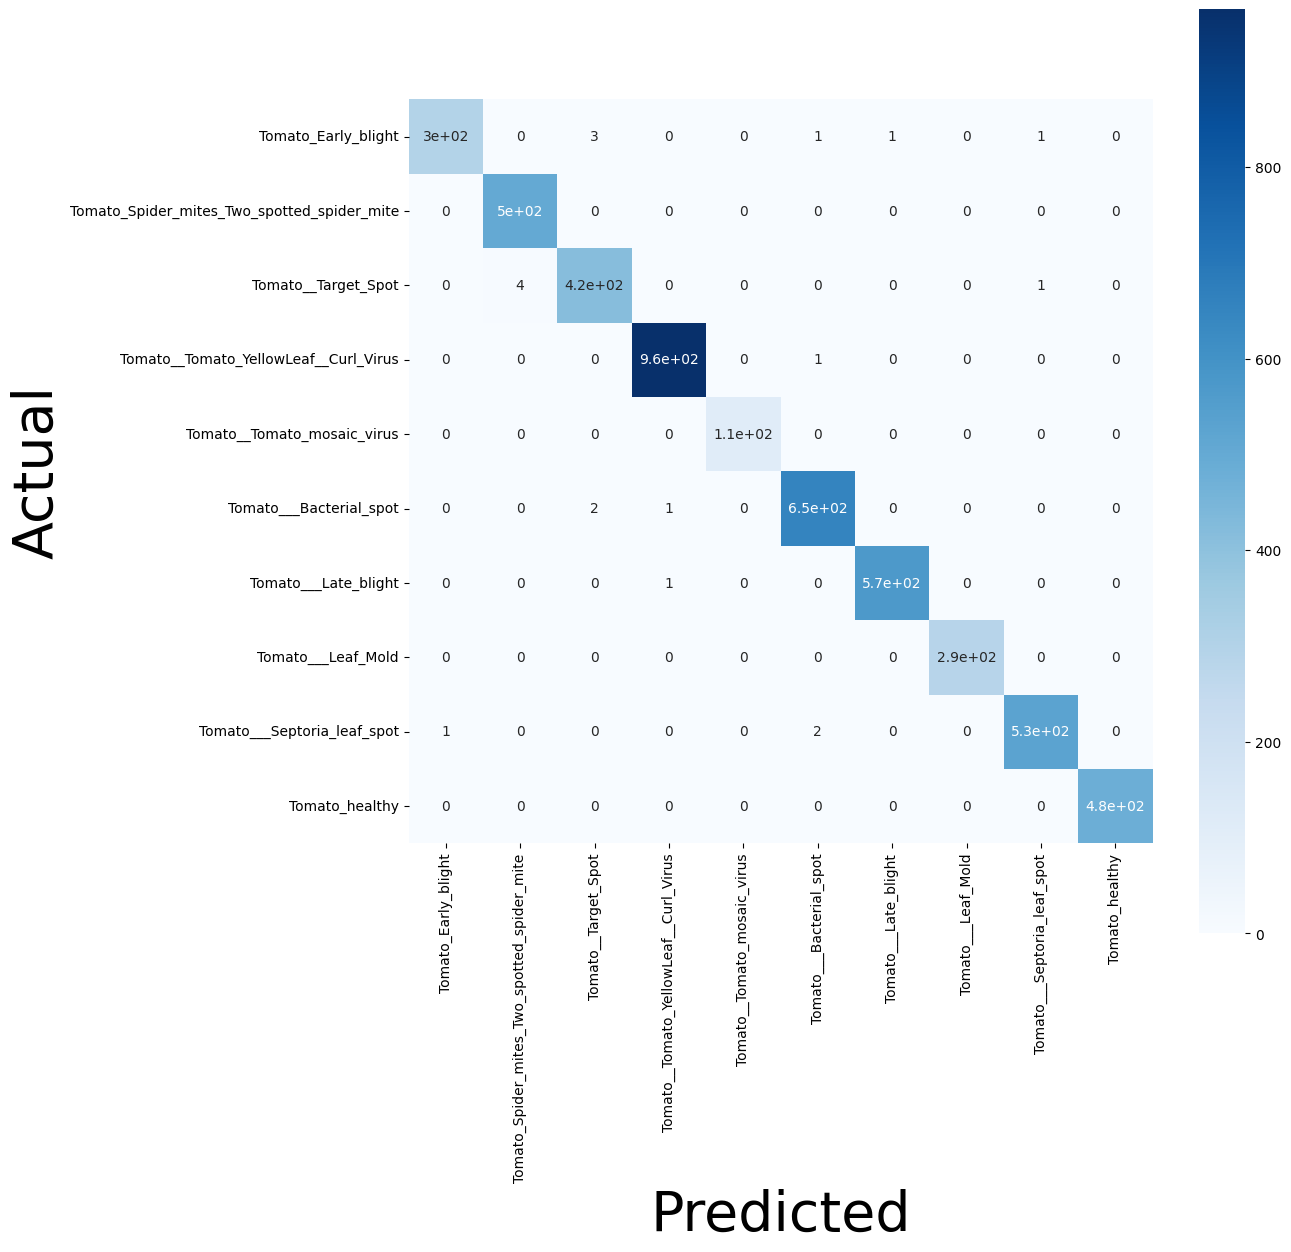

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_true, y_val_pred)

plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

plt.savefig('/kaggle/working/confusion_matrix_blue.png')

In [32]:
# history is model.fit , didnot store actually (here)
# Get the training and validation accuracy values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation accuracy on the first subplot
ax1.plot(epochs, acc, label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot
ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.show()

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of disease classes
disease_class = ['Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot',
                 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
                 'Tomato_healthy']

# Load the image
image = tf.keras.preprocessing.image.load_img(
    # '/content/drive/MyDrive/Major Project/TomatoDataset/early_blight21-150x150.jpg', # - late blight(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/septoria spot leaf.jpeg', # - septoria(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/healthyy.jpeg', # - septoria(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/bacterial spot.jpg', # - leaf mold(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/healthy leaf da.jpeg', # - lateblight(same)
#     '/content/drive/MyDrive/Major Project/TomatoDataset/late_blight1-300x219.jpg', # - late blight(same)
#     '/kaggle/working/TomatoDataset/test/Tomato___Septoria_leaf_spot/edab479f-7af4-45ee-ac67-a5874a58ef52___Matt.S_CG 6803.JPG', #- septoria
#     '/kaggle/working/TomatoDataset/test/Tomato___Late_blight/eda41abe-61cf-439d-9562-e03fee3cd2ca___GHLB2 Leaf 8802.JPG', # - lateblight
#     '/kaggle/working/TomatoDataset/test/Tomato_Spider_mites_Two_spotted_spider_mite/f640c64b-1ab5-4c75-8b30-0d05834ad11b___Com.G_SpM_FL 1610.JPG', # - same 
#     '/kaggle/working/TomatoDataset/test/Tomato___Leaf_Mold/0de02a32-f166-4d67-bbb8-689e96d04c44___Crnl_L.Mold 8811.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_YellowLeaf__Curl_Virus/15cddf07-9796-455e-9ded-a84655b9828e___UF.GRC_YLCV_Lab 02296.JPG', #- same
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/a3f05d12-0e65-4f04-8f7d-5299124eb392___PSU_CG 2204.JPG', # - late blight ; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/1b9dc07a-40ab-45bc-a873-1ad4212e35a3___PSU_CG 2289.JPG', #- spidermites ; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/3ecbb7b8-ad66-4944-886e-de2ae2c2c35e___PSU_CG 2095.JPG', # - spidermites; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato_healthy/d835fbab-7301-4544-aba9-37cb5d25de9f___RS_HL 0506.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato_healthy/cc289e5c-7899-4081-9ea9-c3dc3ad3d2d4___GH_HL Leaf 408.1.JPG', # - same
#     '/kaggle/working/TomatoDataset/train/Tomato__Tomato_mosaic_virus/0a7cc59f-b2b0-4201-9c4a-d91eca5c03a3___PSU_CG 2230.JPG', # - spidermites
    '/kaggle/working/TomatoDataset/test/Tomato__Target_Spot/03e3b044-d81f-49ca-a4d3-c6f7173b55a9___Com.G_TgS_FL 9921.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato___Bacterial_spot/cb4644f6-9f79-4cad-96e8-08da62d43550___GCREC_Bact.Sp 5732.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato_Early_blight/21ffaf6b-7ad0-45bf-bd7e-7d697413ebbd___RS_Erly.B 9500.JPG', # - same
    target_size=(224, 224)
)

# Preprocess the image
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Make a prediction
prediction = model.predict(tf.expand_dims(image, axis=0))

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Print the predicted class nameimport matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define the list of disease classes
disease_class = ['Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot',
                 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
                 'Tomato_healthy']

# Load the image


# Preprocess the image

# Make a prediction


# Get the predicted class index


# Print the predicted class name
predicted_class = disease_class[predicted_class_index]
print("Predicted class:", predicted_class)



# Fertilizer recommendation dictionary
fertilizer_recommendation = {
    'Tomato_Early_blight': 'Use a balanced fertilizer with a ratio of 10-10-10.',
    'Tomato_Spider_mites_Two_spotted_spider_mite': 'Use a fertilizer with a high nitrogen content.',
    'Tomato__Target_Spot': 'Use a fertilizer with a high phosphorus content.',
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 'Use a fertilizer with a high potassium content.',
    'Tomato__Tomato_mosaic_virus': 'Use a fertilizer with a high calcium content.',
    'Tomato_Bacterial_spot': 'Use a fertilizer with a high copper content.',
    'Tomato_Late_blight': 'Use a fertilizer with a high manganese content.',
    'Tomato_Leaf_Mold': 'Use a fertilizer with a high sulfur content.',
    'Tomato_Septoria_leaf_spot': 'Use a fertilizer with a high zinc content.',
    'Tomato_healthy': 'No fertilizer recommendation needed.'
}

root_cause = {
    'Tomato_Early_blight': 'Fungal infection caused by Alternaria solani fungus',
    'Tomato_Spider_mites_Two_spotted_spider_mite': 'Infestation by Tetranychus urticae, commonly known as two-spotted spider mites',
    'Tomato__Target_Spot': 'Fungal infection caused by Corynespora cassiicola',
    'Tomato_YellowLeaf_Curl_Virus': 'Viral infection caused by Tomato yellow leaf curl virus (TYLCV)',
    'Tomato_mosaic_virus': 'Viral infection caused by Tomato mosaic virus (ToMV)',  
    # 'Tomato_Bacterial_spot': 'Bacterial infection caused by Xanthomonas campestris bacteria',
    'Tomato_Bacterial_spot': 'Bacterial infection caused by Xanthomonas perforans or Xanthomonas gardneri or Xanthomonas campestris bacteria',
    'Tomato_Leaf_Mold': 'Fungal infection caused by Passalora fulva (formerly Fulvia fulva)',
    'Tomato_Late_blight': 'Fungal infection caused by Phytophthora infestans',
    'Tomato_Septoria_leaf_spot': 'Fungal infection caused by Septoria lycopersici',
    'Tomato_healthy': 'Healthy tomato plants without any visible diseases or pests',
}

predicted_root_cause = root_cause[predicted_class]

# Get the fertilizer recommendation for the predicted class
fertilizer_recommendation_predicted = fertilizer_recommendation[predicted_class]

# Print the Root cause and fertilizer recommendation
print("Root Cause:", predicted_root_cause)

print("Fertilizer recommendation:", fertilizer_recommendation_predicted)


# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Tomato__Target_Spot
Root Cause: Fungal infection caused by Corynespora cassiicola
Fertilizer recommendation: Use a fertilizer with a high phosphorus content.
